# Loading and exploring the data

In [1]:
import pandas as pd
df = pd.read_csv('/Users/royyanovski/Desktop/DS Project - Product matching/train 2.csv')

In [2]:
df.shape

(34250, 5)

In [3]:
df.head(10)

,posting_id,image,image_phash,title,label_group
0,train_129225211,0000a68812bc7e98c42888dfb1c07da0.jpg,94974f937d4c2433,Paper Bag Victoria Secret,249114794
1,train_3386243561,00039780dfc94d01db8676fe789ecd05.jpg,af3f9460c2838f0f,"Double Tape 3M VHB 12 mm x 4,5 m ORIGINAL / DO...",2937985045
2,train_2288590299,000a190fdd715a2a36faed16e2c65df7.jpg,b94cb00ed3e50f78,Maling TTS Canned Pork Luncheon Meat 397 gr,2395904891
3,train_2406599165,00117e4fc239b1b641ff08340b429633.jpg,8514fc58eafea283,Daster Batik Lengan pendek - Motif Acak / Camp...,4093212188
4,train_3369186413,00136d1cf4edede0203f32f05f660588.jpg,a6f319f924ad708c,Nescafe \xc3\x89clair Latte 220ml,3648931069
5,train_2464356923,0013e7355ffc5ff8fb1ccad3e42d92fe.jpg,bbd097a7870f4a50,CELANA WANITA (BB 45-84 KG)Harem wanita (bisa...,2660605217
6,train_1802986387,00144a49c56599d45354a1c28104c039.jpg,f815c9bb833ab4c8,Jubah anak size 1-12 thn,1835033137
7,train_1806152124,0014f61389cbaa687a58e38a97b6383d.jpg,eea7e1c0c04da33d,KULOT PLISKET SALUR /CANDY PLISKET /WISH KULOT...,1565741687
8,train_86570404,0019a3c6755a194cb2e2c12bfc63972e.jpg,ea9af4f483249972,"[LOGU] Tempelan kulkas magnet angka, tempelan ...",2359912463
9,train_831680791,001be52b2beec40ddc1d2d7fc7a68f08.jpg,e1ce953d1a70618f,BIG SALE SEPATU PANTOFEL KULIT KEREN KERJA KAN...,2630990665


# Exploring the labels

In [4]:
df['label_group'].nunique()

11014

In [5]:
df['label_group'].value_counts().max()

51

In [6]:
df['label_group'].value_counts().min()

2

In [7]:
df['label_group'].value_counts().mean()

3.109678590884329

In [8]:
class_sizes = []
for i in range(1, 52):
    count = sum(df['label_group'].value_counts() == i)
    class_sizes.append(count)

In [9]:
label_counts = [i for i in range(1, 52)]
class_counts_df = pd.DataFrame(list(zip(label_counts, class_sizes)), columns =['Label Count', 'NO. of classes'])

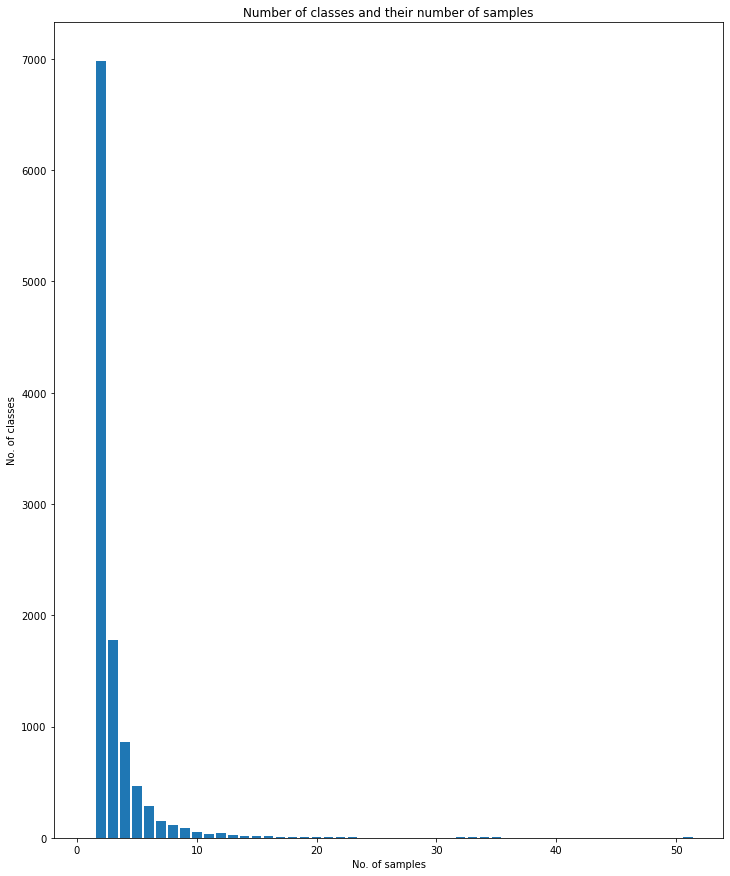

In [11]:
import matplotlib.pyplot as plt

plt.subplots(figsize=(12,15))
plt.bar(class_counts_df['Label Count'], class_counts_df['NO. of classes'])
plt.title('Number of classes and their number of samples')
plt.ylabel('No. of classes')
plt.xlabel('No. of samples')
plt.show()

# Exploring the images

In [ ]:
pip install opencv-python

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

def plot_random_images(images_count):
    
    plot_list = df['image'].sample(n=images_count).tolist()
    size = np.sqrt(images_count)
    if int(size)*int(size) < images_count:
        size = int(size) + 1
        
    plt.figure(figsize=(20, 20))
    
    ind=0
    for image_id in plot_list:
        plt.subplot(size, size, ind + 1)
        image = cv2.imread(f'/Users/royyanovski/Desktop/DS Project - Product matching/train_images/{image_id}', )
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        plt.imshow(image)
        plt.title(image_id, fontsize=12)
        plt.axis("off")
        ind+=1
    plt.show()

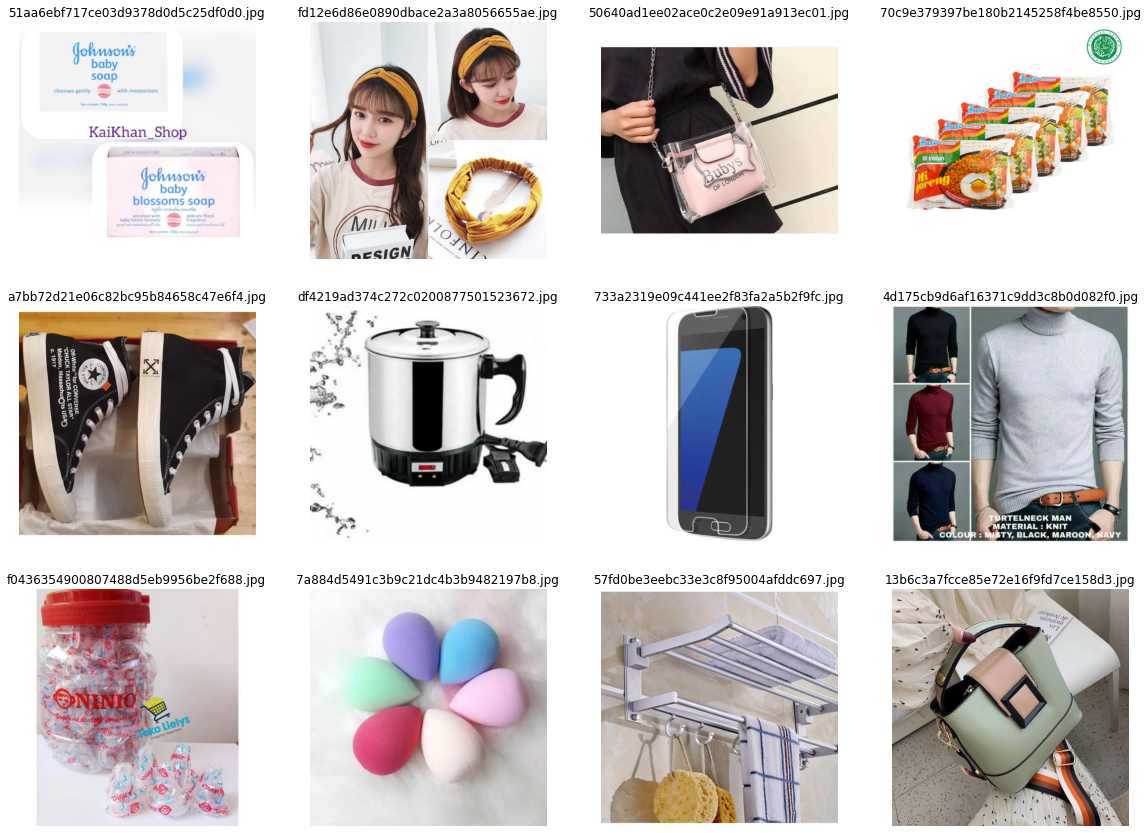

In [13]:
plot_random_images(12)

In [14]:
def plot_group_images(group_id):
    
    plot_list = df[df['label_group'] == group_id]
    plot_list = plot_list['image'].tolist()
    images_count = len(plot_list)
    size = np.sqrt(images_count)
    if int(size)*int(size) < images_count:
        size = int(size) + 1
        
    plt.figure(figsize=(20, 20))
    
    ind=0
    for image_id in plot_list:
        plt.subplot(size, size, ind + 1)
        image = cv2.imread(f'/Users/royyanovski/Desktop/DS Project - Product matching/train_images/{image_id}', )
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        plt.imshow(image)
        plt.title(image_id, fontsize=6)
        plt.axis("off")
        ind+=1
    plt.show()
    
    sample = df[df['label_group'] == group_id]
    print(f'Total number of items in group {group_id}: {len(sample)}, number of unique titles: {sample.nunique()}')

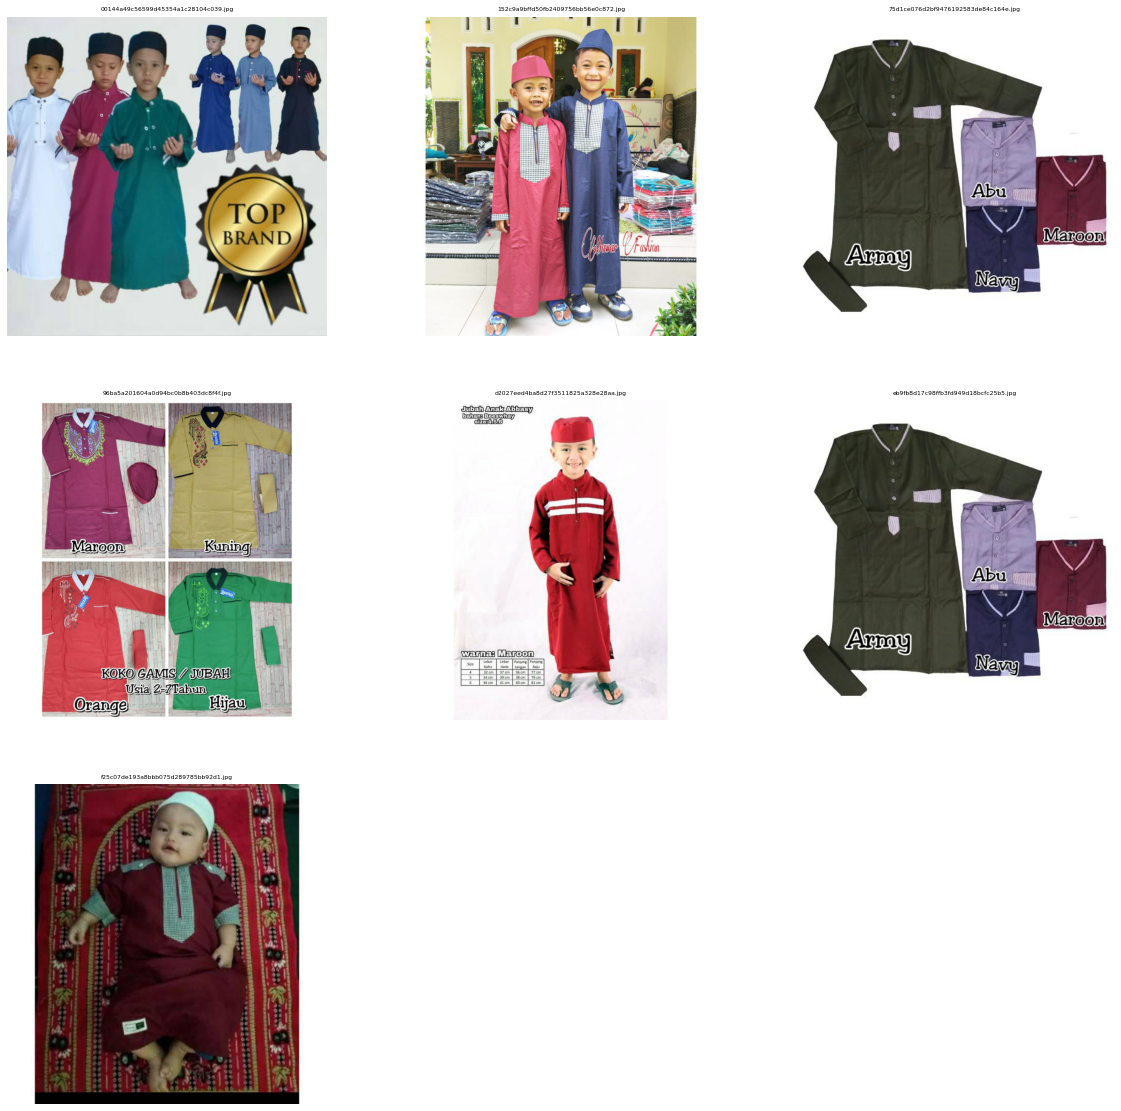

Total number of items in group 1835033137: 7, number of unique titles: posting_id     7
image          7
image_phash    6
title          7
label_group    1
dtype: int64


In [15]:
plot_group_images(1835033137)

In [16]:
rand_group_df = df[df['label_group'] == 1835033137]

In [17]:
all_titles = []
for title in rand_group_df['title']:
    title = title.lower()
    words = title.split(' ')
    all_titles.append(words)

for word in all_titles[0]:
        if word in all_titles[1] and word in all_titles[2] and word in all_titles[3] and word in all_titles[4] and word in all_titles[5] and word in all_titles[6]:
            print(word)        

jubah
anak


In [18]:
from PIL import Image

image1 = Image.open('/Users/royyanovski/Desktop/DS Project - Product matching/train_images/' + df.loc[0, 'image'])

In [19]:
print(image1.format, image1.mode, image1.size)

JPEG RGB (1024, 1024)


In [20]:
image1.show()

In [21]:
from matplotlib import image
from matplotlib import pyplot

data = image.imread('/Users/royyanovski/Desktop/DS Project - Product matching/train_images/' + df.loc[0, 'image'])

In [22]:
print(data.dtype, data.shape)

uint8 (1024, 1024, 3)


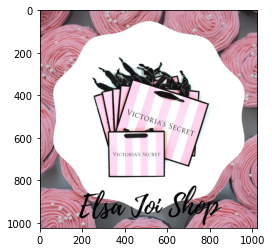

In [23]:
pyplot.imshow(data)

In [24]:
gs_image = image1.convert(mode='L')

In [25]:
gs_image.show()

In [26]:
gs_image.save('/Users/royyanovski/Desktop/DS Project - Product matching/train_images/greyscale_try.jpg')

In [27]:
gs_data = image.imread('/Users/royyanovski/Desktop/DS Project - Product matching/train_images/greyscale_try.jpg')

In [28]:
print(gs_data.dtype, gs_data.shape)

uint8 (1024, 1024)


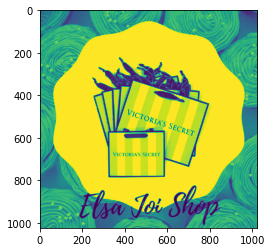

In [29]:
pyplot.imshow(gs_data)

In [30]:
flat = gs_data.ravel()

In [31]:
flat.shape

(1048576,)

In [32]:
shapes = []
for i in range(len(df)):
    data = image.imread('/Users/royyanovski/Desktop/DS Project - Product matching/train_images/' + df.loc[i, 'image'])
    shapes.append(data.shape)

In [33]:
total_no = len(df)
unique_posting_id = df['posting_id'].nunique
unique_image_phash = df['image_phash'].nunique
unique_title = df['title'].nunique
unique_label_group = df['label_group'].nunique

In [34]:
shapes_ser = pd.Series(shapes)
shapes_ser.nunique()

824

In [35]:
shapes_ser.value_counts().sort_values(ascending=False)[:20]

(640, 640, 3)      12259
(1024, 1024, 3)     6384
(800, 800, 3)       3916
(700, 700, 3)       2935
(1000, 1000, 3)     1540
(600, 600, 3)        503
(500, 500, 3)        502
(720, 720, 3)        480
(750, 750, 3)        205
(300, 300, 3)        203
(960, 960, 3)        187
(1001, 1001, 3)      181
(900, 900, 3)        166
(850, 850, 3)        103
(450, 450, 3)        101
(400, 400, 3)         94
(225, 225, 3)         91
(320, 320, 3)         77
(554, 554, 3)         71
(480, 480, 3)         54
dtype: int64

In [36]:
sum(shapes_ser.value_counts().sort_values(ascending=False)[:5])

27034

In [37]:
sum(shapes_ser.value_counts().sort_values(ascending=False)[:20])

30052

In [38]:
sum(shapes_ser.value_counts() == 1)

182

In [39]:
sum(shapes_ser.value_counts() <= 3)

394

In [40]:
widths = []
lengths = []
dims = []
for shape in shapes:
    widths.append(shape[0])
    lengths.append(shape[1])
    dims.append(shape[2])

In [41]:
widths_ser = pd.Series(widths)
lengths_ser = pd.Series(lengths)
dims_ser = pd.Series(dims)

In [42]:
print(widths_ser.nunique())
print(lengths_ser.nunique())
print(dims_ser.nunique())

751
754
1


In [43]:
lengths_ser.describe()

count    34250.000000
mean       753.100175
std        189.337824
min        100.000000
25%        640.000000
50%        700.000000
75%        960.000000
max       5000.000000
dtype: float64

In [44]:
widths_ser.describe()

count    34250.000000
mean       753.110745
std        189.319626
min        100.000000
25%        640.000000
50%        700.000000
75%        960.000000
max       5000.000000
dtype: float64

# Titles basic model

In [45]:
all_words = []
for title in df['title']:
    title_words = title.lower().split(' ')
    for each_word in title_words:
        all_words.append(each_word)

In [46]:
word_counts = []
for word in all_words:
    word_counts.append((word, all_words.count(word)))

In [47]:
word_counts = list(set(word_counts))

In [48]:
len(word_counts)

33899

In [49]:
word_counts.sort(key = lambda x: x[1], reverse=True)

In [50]:
common_words = [word[0] for word in word_counts[:500]]

In [51]:
df2 = pd.DataFrame(columns=common_words)

In [52]:
df3 = pd.concat([df,df2], axis=1)

In [65]:
for word in common_words:
    for i, title in enumerate(df['title'][:5000]):
        if word in title:
            df3.loc[i, word] = 1
        else:
            df3.loc[i, word] = 0

In [66]:
df4 = df3[:5000]

In [67]:
df5 = df4.drop(['posting_id', 'image', 'image_phash', 'title'], axis=1)

In [68]:
df5.head()

,label_group,/,-,anak,wanita,,original,1,murah,tas,...,batam,teh,tv,tutup,you,big,halus,kuning,instant,hias
0,249114794,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2937985045,1,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2395904891,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4093212188,1,1,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3648931069,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [70]:
sum(y.value_counts()<2)

2979

In [75]:
df6 = df5.groupby('label_group').filter(lambda x: len(x) > 1)

In [76]:
X = df6.drop(['label_group'], axis=1)
y = df6['label_group']

In [79]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=12)

In [169]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

rf_clf = RandomForestClassifier(random_state=0, n_estimators=150, max_depth=50)
rf_clf.fit(X_train, y_train)
y_pred = rf_clf.predict(X_test)

In [170]:
print('Accuracy of Random Forest classifier on training set: {:.2f}'
     .format(rf_clf.score(X_train, y_train)))
print()
print(f'Accuracy of Random Forest classifier on test set: {accuracy_score(y_test, y_pred):.2f}')

Accuracy of Random Forest classifier on training set: 0.88

Accuracy of Random Forest classifier on test set: 0.31


In [96]:
df7 = pd.concat([df, df2], axis=1)

In [171]:
for word in common_words:
    for i, title in enumerate(df['title'][:20000]):
        if word in title:
            df7.loc[i, word] = 1
        else:
            df7.loc[i, word] = 0

In [172]:
df8 = df7[:20000]

In [173]:
df9 = df8.drop(['posting_id', 'image', 'image_phash', 'title'], axis=1)

In [174]:
X = df9.drop(['label_group'], axis=1)
y = df9['label_group']

In [175]:
sum(y.value_counts()<2)

4154

In [177]:
df10 = df9.groupby('label_group').filter(lambda x: len(x) > 1)

In [179]:
X = df10.drop(['label_group'], axis=1)
y = df10['label_group']

In [180]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=12)

In [ ]:
from sklearn.metrics import accuracy_score

rf_clf2 = RandomForestClassifier(random_state=0)
rf_clf2.fit(X_train, y_train)
y_pred = rf_clf2.predict(X_test)


In [184]:
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(rf_clf2.score(X_train, y_train)))
print()
print('Metrics of Decision Tree classifier on test set:')
print(accuracy_score(y_test, y_pred))

Accuracy of Decision Tree classifier on training set: 0.79

Metrics of Decision Tree classifier on test set:
0.24195583596214512


# Duplicates

In [87]:
for col in df.columns:
    print(col, df[col].nunique())

posting_id 34250
image 32412
image_phash 28735
title 33117
label_group 11014


In [88]:
print('\nNumber of duplicated rows: ',df[df.duplicated()].shape[0])


Number of duplicated rows:  0


In [ ]:
# There are 34,250 IDs and 32,414 images in the folder, bu no duplicate rows. What does in mean? 
# different products used the same image? maybe even same image + title?

In [89]:
print(df.isna().sum())

posting_id     0
image          0
image_phash    0
title          0
label_group    0
dtype: int64


## A deeper look into the duplicated images and titles

# Baseline calculation

In [90]:
random_indices = np.random.randint(len(df['label_group'].unique()), size=len(df))

In [91]:
random_labels = np.take(df['label_group'].unique(), random_indices)

In [92]:
rand_label_sum = np.sum(random_labels == df['label_group'])

In [93]:
print(f'The baseline accuracy by random labels is: {rand_label_sum / len(df):.5f}')

The baseline accuracy by random labels is: 0.00015


In [94]:
print(f'The baseline accuracy by the largest class is: {51 / len(df):.5f}')

The baseline accuracy by the largest class is: 0.00149
